### Use the preprocessed data for ML model building. 

In [9]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/ml_modeling_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, folder_path="models", file_name="untitled_model.sav"):
    pickle.dump(model, open(os.path.join(folder_path, file_name), 'wb'))

### Read in data

#### Full feature set

In [10]:
HEARTDISEASE_FULL_PATH = "dataset/afterpreprocessing/full"

heartdisease_data = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease.csv'))
heartdisease_data.head()

,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2,1660,1,1,2,3,30,2,2,8,1,1,1,2,5,1,2,1
1,2,2034,2,1,1,88,88,2,2,13,1,3,1,2,7,2,2,2
2,2,2658,1,1,2,20,30,2,1,10,1,1,1,4,8,1,2,2
3,2,2421,2,1,2,88,88,2,2,12,1,3,2,3,6,2,2,1
4,2,2657,1,9,2,15,10,2,2,10,2,1,1,4,6,2,2,2


In [11]:
x_train = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_x_train.csv'))
x_train.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2986,2,1,2,30,88,1,1,8,2,3,1,5,6,2,2,2
1,2614,2,1,2,88,88,1,1,11,2,3,2,4,8,2,2,2
2,3082,2,1,2,2,88,2,1,10,2,1,1,2,8,2,1,2
3,2349,1,1,2,88,88,2,2,11,1,3,2,3,9,2,2,2
4,2561,1,1,1,30,88,1,2,8,6,3,2,4,6,1,2,2


In [12]:
y_train = pd.read_csv(os.path.join(HEARTDISEASE_FULL_PATH, f'heartDisease_y_train.csv'))
y_train.head()

,heartDisease
0,1
1,1
2,1
3,1
4,1


#### Reduced feature set

In [13]:
HEARTDISEASE_RED_PATH = "dataset/afterpreprocessing/reduced"

reduced_heartdisease_data = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red.csv'))
heartdisease_data.head()

,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2,1660,1,1,2,3,30,2,2,8,1,1,1,2,5,1,2,1
1,2,2034,2,1,1,88,88,2,2,13,1,3,1,2,7,2,2,2
2,2,2658,1,1,2,20,30,2,1,10,1,1,1,4,8,1,2,2
3,2,2421,2,1,2,88,88,2,2,12,1,3,2,3,6,2,2,1
4,2,2657,1,9,2,15,10,2,2,10,2,1,1,4,6,2,2,2


In [14]:
red_x_train = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_x_train.csv'))
red_x_train.head()

,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity
0,2573,2,1,2,88,88,2,1,8,1,3,1
1,3613,1,1,2,88,20,1,2,11,1,1,1
2,2568,2,1,2,88,88,2,1,6,1,3,1
3,2771,2,1,2,88,88,2,1,10,5,3,1
4,3595,1,1,2,88,88,2,1,8,1,3,2


In [15]:
red_y_train = pd.read_csv(os.path.join(HEARTDISEASE_RED_PATH, f'heartDisease_red_y_train.csv'))
red_y_train.head()

,heartDisease
0,2
1,1
2,2
3,2
4,2


### Full Feature Set With Decision Tree

In [16]:
# Training and Visualizing a Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
DECISION_TREE_PATH = os.path.join(MODELS_PATH, 'decision_tree')

def FullDecisionTreeModel(x_train, y_train):
    tree_clf = DecisionTreeClassifier(max_depth=5,random_state=42)
    start_time = time.time()
    tree_clf.fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=x_train.columns, class_names=str(y_train), rounded=True, filled=True))
    graph.format = 'png'
    graph.render( IMAGES_PATH + '/decision_tree/decision_tree', view=False)
    filename = 'full_decision_tree_model.sav'
    save_model(tree_clf, DECISION_TREE_PATH, filename)

FullDecisionTreeModel(x_train, y_train)


Training Time: 0.10s


### Full Feature Set with Logistic Regression
We chose Newton-Cholesky for our Logistic Regression algorithm since it works well when the dataset has more samples than features and when using binary classification.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
LOGREG_PATH = os.path.join(MODELS_PATH, 'log_regression')

def FullLogisticRegression(x_train, y_train):
    scaler = StandardScaler()
    scaled_x = x_train.copy()
    scaler.fit(scaled_x)
    start_time = time.time()
    y_train = np.ravel(y_train)
    clf = LogisticRegression(solver='newton-cholesky', random_state=1).fit(scaled_x, y_train)
    clf.predict(scaled_x)
    clf.predict_proba(scaled_x)
    clf.score(scaled_x, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'full_logregression_model.sav'
    save_model(clf, LOGREG_PATH, filename)

FullLogisticRegression(x_train, y_train)

Training Time: 0.14s


### Full Feature Set with KNN

In [18]:
# KNN algorthm

from sklearn.neighbors import KNeighborsClassifier

KNN_PATH = os.path.join(MODELS_PATH, 'knn')

# Building a model using KNeighborsClassifier 
def FullKNN(x_train, y_train):
    start_time = time.time()
    y_train = np.ravel(y_train)
    knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'full_knn_model.sav'
    save_model(knn, KNN_PATH, filename)

FullKNN(x_train, y_train)

Training Time: 0.01s


### Full Feature Set with Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
GAUSSIANNB_PATH = os.path.join(MODELS_PATH, 'gaussianNB')

def GaussianNBModel (x_train,y_train):
    gnb = GaussianNB()
    start_time = time.time()
    y_train = np.ravel(y_train)
    gnb.fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'full_gaussianNB_model.sav'
    save_model(gnb, GAUSSIANNB_PATH, filename)

GaussianNBModel(x_train, y_train)

Training Time: 0.02s


### Full Feature Set with Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RANDOMFOREST_PATH = os.path.join(MODELS_PATH, 'randomforest')

def FullRandomForestModel(x_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=40)
    start_time = time.time()
    y_train = np.ravel(y_train)
    clf.fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'full_randomforest_model.sav'
    save_model(clf, RANDOMFOREST_PATH, filename)

FullRandomForestModel(x_train, y_train)
    

Training Time: 8.14s


### Reduced Feature Set With Decision Tree

In [21]:

def ReducedDecisionTreeModel(x_train, y_train):
    tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    start_time = time.time()
    tree_clf.fit(x_train, y_train)
    graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=x_train.columns, class_names=str(y_train), rounded=True, filled=True))
    graph.format = 'png'
    graph.render( IMAGES_PATH + '/decision_tree/reduced_decision_tree', view=False)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'reduced_decision_tree_model.sav'
    save_model(tree_clf, DECISION_TREE_PATH, filename)

ReducedDecisionTreeModel(red_x_train, red_y_train)

Training Time: 0.38s


### Reduced Feature Set With Logistic Regression

In [22]:
def ReducedLogisticRegression(x_train, y_train):
    scaler = StandardScaler()
    scaled_x = x_train.copy()
    scaler.fit(scaled_x)
    start_time = time.time()
    y_train = np.ravel(y_train)
    clf = LogisticRegression(solver='newton-cholesky', random_state=1).fit(scaled_x, y_train)
    clf.predict(scaled_x)
    clf.predict_proba(scaled_x)
    clf.score(scaled_x, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'reduced_logregression_model.sav'
    save_model(clf, LOGREG_PATH, filename)

ReducedLogisticRegression(red_x_train, red_y_train)

Training Time: 0.07s


### Reduced Feature Set With KNN

In [23]:
# Building a model using KNeighborsClassifier 
def ReducedKNN(x_train, y_train):
    start_time = time.time()
    y_train = np.ravel(y_train)
    knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'reduced_knn_model.sav'
    save_model(knn, KNN_PATH, filename)

ReducedKNN(red_x_train, red_y_train)

Training Time: 0.18s


### Reduced Feature Set With Gaussian Naive Bayes

In [24]:

def ReducedGaussianNBModel (x_train,y_train):
    gnb = GaussianNB()
    start_time = time.time()
    y_train = np.ravel(y_train)
    gnb.fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'reduced_gaussianNB_model.sav'
    save_model(gnb, GAUSSIANNB_PATH, filename)

ReducedGaussianNBModel(red_x_train, red_y_train)

Training Time: 0.01s


### Reduced Feature Set with Random Forest

In [25]:

def ReducedRandomForestModel(x_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=40)
    start_time = time.time()
    y_train = np.ravel(y_train)
    clf.fit(x_train, y_train)
    end_time = time.time()
    print("Training Time: {:.2f}s".format(end_time-start_time))
    filename = 'reduced_randomforest_model.sav'
    save_model(clf, RANDOMFOREST_PATH, filename)

ReducedRandomForestModel(red_x_train, red_y_train)
    

Training Time: 4.84s


## Load Models

In [26]:
full_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "full_decision_tree_model.sav"), 'rb'))
reduced_decisiontree_model = pickle.load(open(os.path.join(DECISION_TREE_PATH, "reduced_decision_tree_model.sav"), 'rb'))
full_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "full_gaussianNB_model.sav"), 'rb'))
reduced_gaussianNB_model = pickle.load(open(os.path.join(GAUSSIANNB_PATH, "reduced_gaussianNB_model.sav"), 'rb'))
full_knn_model = pickle.load(open(os.path.join(KNN_PATH, "full_knn_model.sav"), 'rb'))
reduced_knn_model = pickle.load(open(os.path.join(KNN_PATH, "reduced_knn_model.sav"), 'rb'))
full_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "full_logregression_model.sav"), 'rb'))
reduced_logregression_model = pickle.load(open(os.path.join(LOGREG_PATH, "reduced_logregression_model.sav"), 'rb'))
reduced_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "reduced_randomforest_model.sav"), 'rb'))
full_randomforest_model = pickle.load(open(os.path.join(RANDOMFOREST_PATH, "full_randomforest_model.sav"), 'rb'))

Full Decision Tree Metrics:

Number of Positive Predictions (Heart Disease): 48093
Number of Negative Predictions (No Heart Disease): 39451
              precision    recall  f1-score   support

           1       0.74      0.81      0.77     43772
           2       0.79      0.71      0.75     43772

    accuracy                           0.76     87544
   macro avg       0.76      0.76      0.76     87544
weighted avg       0.76      0.76      0.76     87544

AUC: 0.838
Mean Absolute Error of the Full Decision Tree Model is 0.23815452800877274
False Positive Rate [0.         0.239491   0.35993329 0.37035091 0.53561638 0.54235584
 0.60929361 0.60975053 0.70634195 0.71248743 0.71943251 0.77640958
 0.83530567 0.93283378 0.93356484 0.93632916 0.9371516  0.93945901
 0.93959609 0.95355478 0.95839806 0.96205337 0.96735356 0.96799324
 0.98437357 0.98457918 0.98610984 0.98638399 0.98939962 0.98960523
 0.99282646 1.         1.        ] True Postitive Rate [0.         0.01176551 0.03111578 0.0

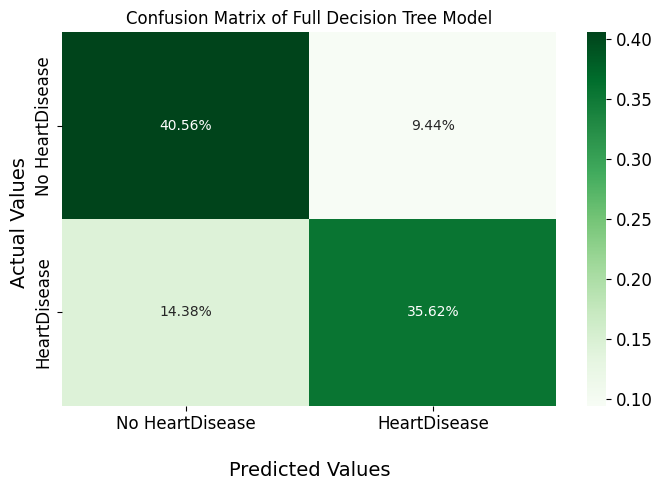

Saving figure decision_tree


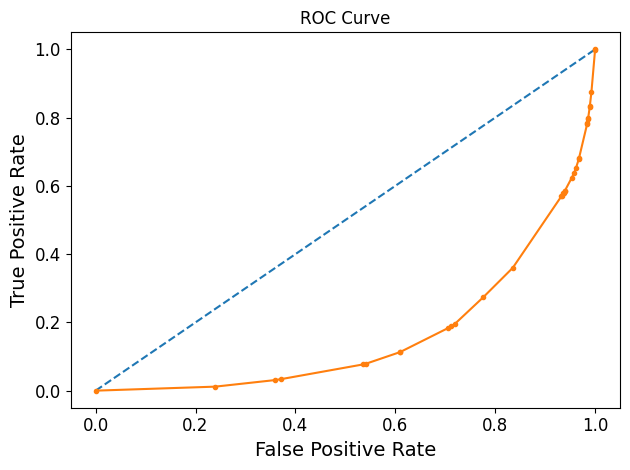

Saving figure decision_tree


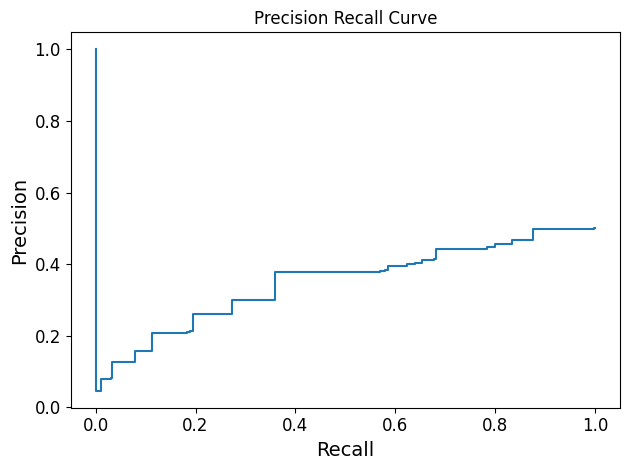

In [27]:
# Setup
import numpy as np 
import pandas as pd 
import os
import pickle
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, PrecisionRecallDisplay, precision_recall_curve

#Predict the response for test dataset
DECISION_TREE_PATH = os.path.join('decision_tree')
def evaluate_FullDecisionTree():
    print("Full Decision Tree Metrics:\n")
    clf = full_decisiontree_model
    y_pred = clf.predict(x_train)
    print(f"Number of Positive Predictions (Heart Disease): {np.sum(y_pred == 1)}\nNumber of Negative Predictions (No Heart Disease): {np.sum(y_pred == 2)}")

    cm = confusion_matrix(y_train, y_pred)

    # evaluate 
    print(classification_report(y_train, y_pred))

    # predict probabilities
    probs = clf.predict_proba(x_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_train, probs)

    print('AUC: %.3f' % auc)

    mae = mean_absolute_error(y_train, y_pred)
    print("Mean Absolute Error of the Full Decision Tree Model is", mae)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_train, probs,
                                    pos_label=1)

    #print True and False Positive Rates 
    print("False Positive Rate", fpr, "True Postitive Rate", tpr)

    # plot confusion matrix
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    # labels
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.set_title('Confusion Matrix of Full Decision Tree Model')
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    save_fig(DECISION_TREE_PATH,f"Confusion_Matrix_of_Full_Decision_Tree_Model")
    plt.show()


    # plot ROC Curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"ROC_Curve_of_Full_Decision_Tree_Model")
    plt.show()

    # Plot Precision Recall Display
    prec, recall, _ = precision_recall_curve(y_train, probs, pos_label=1)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    # labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    # show the plot
    save_fig(DECISION_TREE_PATH,f"Precision_Recall_Curve_of_Full_Decision_Tree_Model")
    plt.show()
    return fpr, tpr

fpr, tpr = evaluate_FullDecisionTree()